📊 Cohort Table (User Count):
📈 Retention Rate Table:


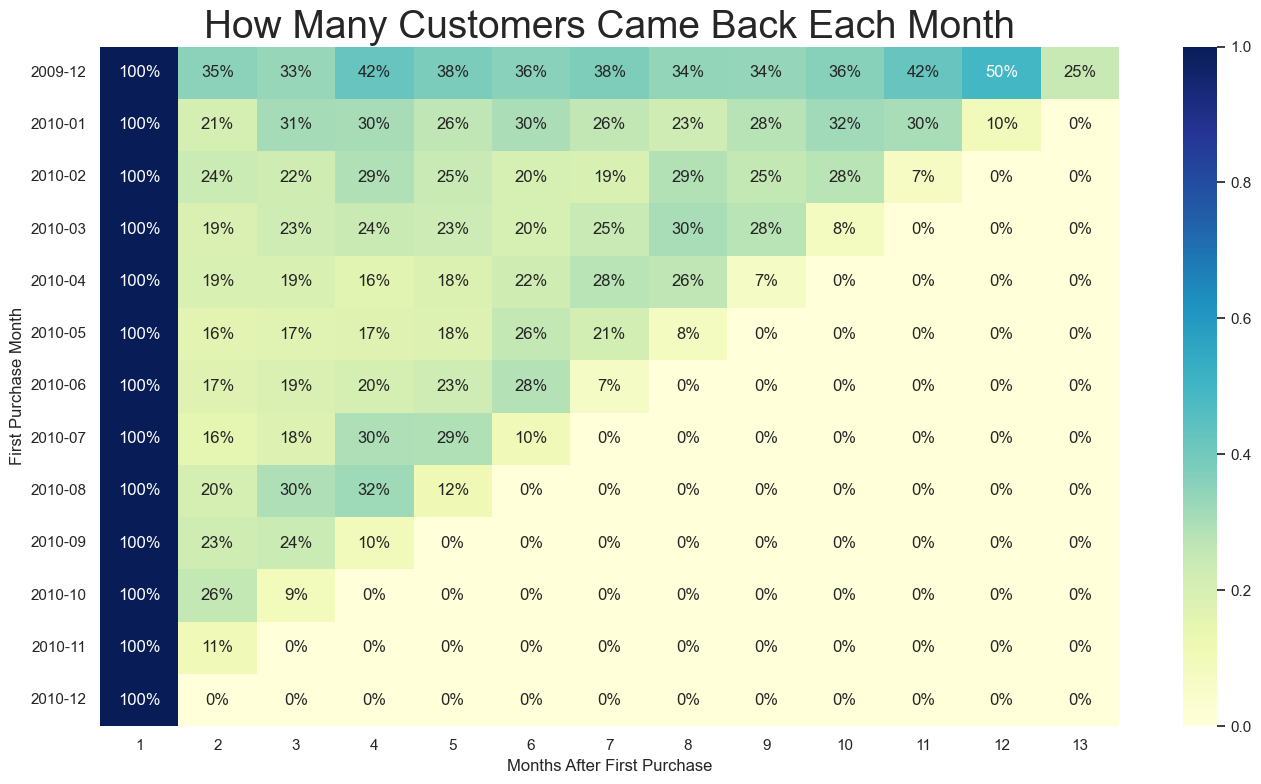

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("cleaned_online_retail.csv", parse_dates=["InvoiceDate"])
df.head()
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)
df['CohortMonth'] = df.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period('M').astype(str)

#Calculation of  Cohort Index (1st month = 1, next = 2)
def get_month_diff(d1, d2):
    d1 = pd.to_datetime(d1)
    d2 = pd.to_datetime(d2)
    return (d1.dt.year - d2.dt.year) * 12 + (d1.dt.month - d2.dt.month) + 1

df['CohortIndex'] = get_month_diff(df['InvoiceDate'], pd.to_datetime(df['CohortMonth']))
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['Customer ID'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Customer ID')
cohort_pivot.fillna(0, inplace=True)
cohort_pivot = cohort_pivot.astype(int)

# Display the Cohort Table
print("📊 Cohort Table (User Count):")
cohort_pivot
#Calculation of  Retention Rate
cohort_sizes = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_sizes, axis=0).round(3)
# Display the Retention Table
print("📈 Retention Rate Table:")
retention
#Visualize Retention Table using Heatmap
plt.figure(figsize=(14, 8))
plt.title("How Many Customers Came Back Each Month", fontsize=28)
sns.heatmap(retention,annot=True,fmt=".0%", cmap="YlGnBu",cbar=True)
            
plt.xlabel("Months After First Purchase")  
plt.ylabel("First Purchase Month")         
plt.tight_layout()
plt.show()

